Checkpoint 1 - Análise de dados de filmes (MOVIES) ou séries

Carlos Eduardo Queiroz Menezes RM99849


Pedro Henrique Bicas Couto RM99534

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Carregar os dados
imdb_data = pd.read_csv("imdb_top_1000.csv")
netflix_df = pd.read_csv('netflix_titles.csv')
rt_critic_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
rt_movies_df = pd.read_csv('rotten_tomatoes_movies.csv')
oscar_winners_df = pd.read_csv('oscar-winners.csv')

1. Quais gêneros de filmes vencedores do Oscar têm melhor aceitação crítica e popular?

In [34]:
# Comparar as notas médias dos críticos e do público para diferentes gêneros.
rt_movies_df['genres'] = rt_movies_df['genres'].str.split(', ')
rt_movies_df_exploded = rt_movies_df.explode('genres')

# Calculando a média de notas por gênero
genre_rating = rt_movies_df_exploded.groupby('genres').agg({
    'tomatometer_rating': 'mean',
    'audience_rating': 'mean'
}).reset_index()

print('Average Ratings by Genre:')
print(genre_rating)


Average Ratings by Genre:
                       genres  tomatometer_rating  audience_rating
0          Action & Adventure           54.184359        57.839615
1                   Animation           64.089457        65.819489
2               Anime & Manga           75.368421        75.000000
3   Art House & International           71.018444        66.527038
4                    Classics           78.385549        71.047330
5                      Comedy           55.239449        58.339410
6                 Cult Movies           60.490385        55.846154
7                 Documentary           80.939350        73.280102
8                       Drama           63.234849        63.076931
9        Faith & Spirituality           63.886076        70.341772
10              Gay & Lesbian           57.410256        61.486842
11                     Horror           51.575074        46.402668
12              Kids & Family           55.621743        60.294329
13  Musical & Performing Arts       

2. Há um padrão entre a duração do filme e suas avaliações?

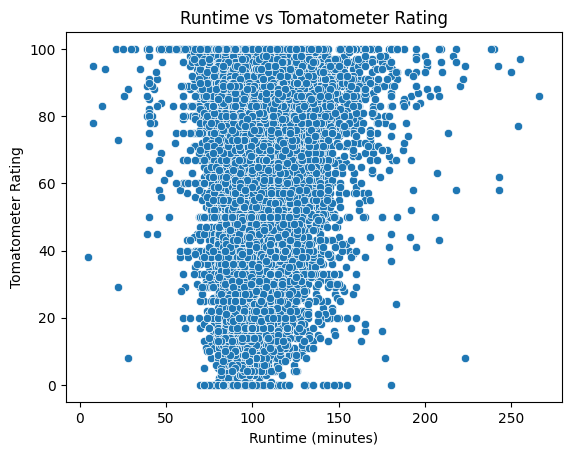

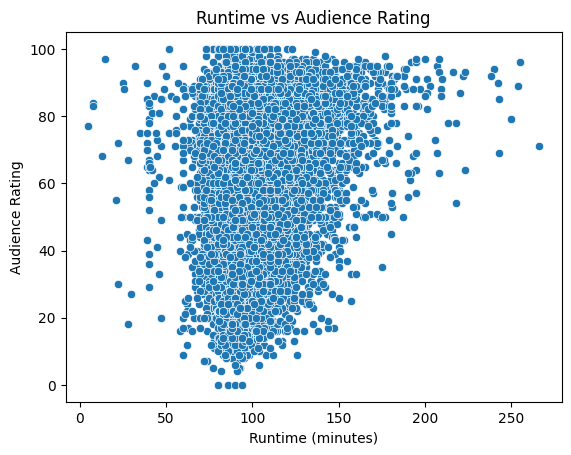

In [35]:

# Considerando Rotten Tomatoes
sns.scatterplot(data=rt_movies_df, x='runtime', y='tomatometer_rating')
plt.title('Runtime vs Tomatometer Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Tomatometer Rating')
plt.show()

sns.scatterplot(data=rt_movies_df, x='runtime', y='audience_rating')
plt.title('Runtime vs Audience Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Audience Rating')
plt.show()

3. Quais gêneros tendem a receber as maiores avaliações dos críticos?

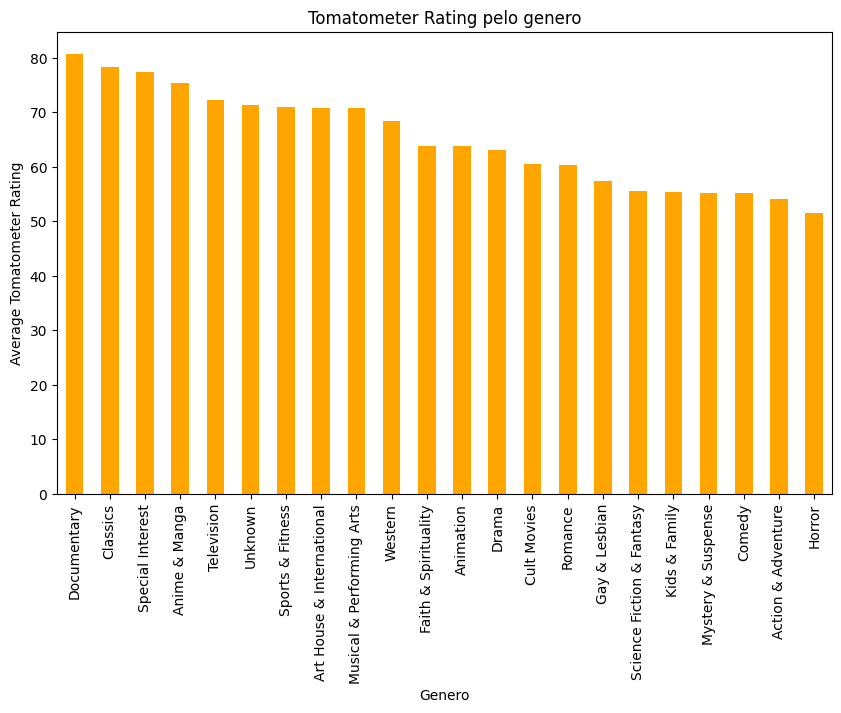

In [88]:
rt_movies_df['genres'] = rt_movies_df['genres'].fillna('Unknown')
rt_movies_df['tomatometer_rating'] = rt_movies_df['tomatometer_rating'].fillna(0)
genre_ratings = rt_movies_df[['genres', 'tomatometer_rating']].copy()
genre_ratings['genres'] = genre_ratings['genres'].str.split(', ')

genre_ratings = genre_ratings.explode('genres')

genre_avg_ratings = genre_ratings.groupby('genres')['tomatometer_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
genre_avg_ratings.plot(kind='bar', color='orange')
plt.title("Tomatometer Rating pelo genero")
plt.ylabel("Average Tomatometer Rating")
plt.xlabel("Genero")
plt.xticks(rotation=90)
plt.show()


Gêneros com as maiores classificações médias da crítica : O gráfico de barras mostra as classificações médias do Tomatometer para cada gênero. Certos gêneros, como documentários e clássicos, tendem a receber classificações mais altas dos críticos, enquanto gêneros como comédias e filmes de ação têm pontuações mais baixas em média.

4. Quais diretores são mais premiados no Oscar?

In [36]:
directors_counts = rt_movies_df['directors'].value_counts()
print('Directors with Most Oscar-Winning Films:')
print(directors_counts)

directors_counts = rt_movies_df['directors'].value_counts()
print('Directors with Most Oscar-Winning Films:')
print(directors_counts)

Directors with Most Oscar-Winning Films:
directors
Clint Eastwood                          38
Alfred Hitchcock                        36
Woody Allen                             36
Sidney Lumet                            31
Steven Spielberg                        30
                                        ..
Ralph Arlyck                             1
Antoine Le                               1
Jonathan Gruber, Ari Daniel Pinchot      1
John A. Alonzo                           1
Byron Howard, Rich Moore, Jared Bush     1
Name: count, Length: 8933, dtype: int64


5. Qual é a tendência temporal das notas dos críticos e do público para filmes vencedores do Oscar?

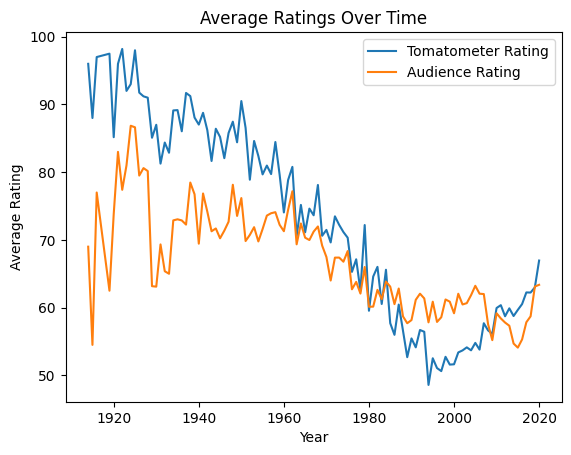

In [39]:
# Convertendo as datas e avaliando tendências ao longo dos anos
rt_movies_df['original_release_date'] = pd.to_datetime(rt_movies_df['original_release_date'])
rt_movies_df['year'] = rt_movies_df['original_release_date'].dt.year

yearly_rating = rt_movies_df.groupby('year').agg({
    'tomatometer_rating': 'mean',
    'audience_rating': 'mean'
}).reset_index()

sns.lineplot(data=yearly_rating, x='year', y='tomatometer_rating', label='Tomatometer Rating')
sns.lineplot(data=yearly_rating, x='year', y='audience_rating', label='Audience Rating')
plt.title('Average Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

6. Quais são os países mais mencionados nos filmes vencedores do Oscar?

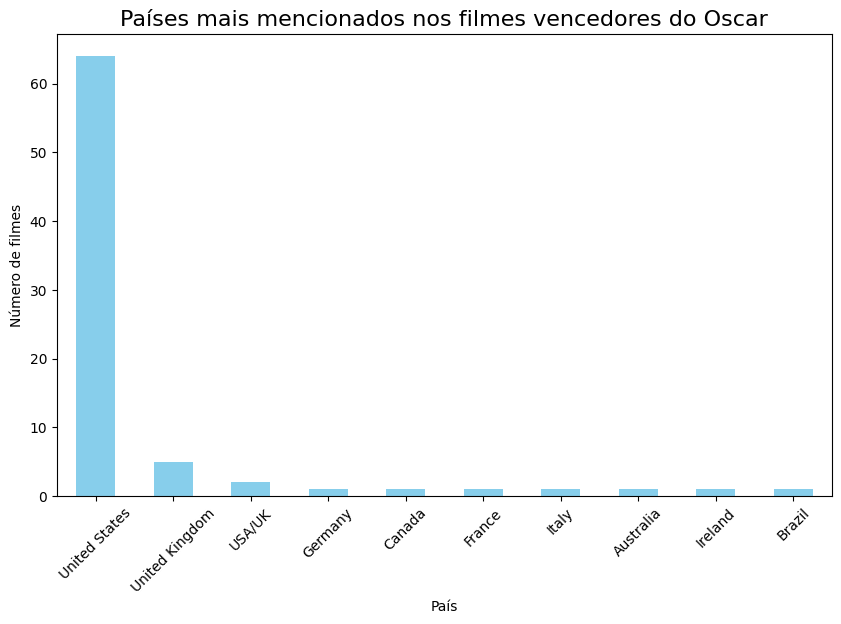

In [77]:
# Contar os países na coluna 'Place'
country_counts = oscar_winners_df['Place'].value_counts()

# Exibir os 10 países mais mencionados
top_countries = country_counts.head(10)

# Criar um gráfico de barras para visualizar os países mais mencionados
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Países mais mencionados nos filmes vencedores do Oscar', fontsize=16)
plt.ylabel('Número de filmes')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.show()


7. Como as avaliações da crítica e do público se correlacionam?

Correlação entre as avaliações da crítica e do público : O gráfico de dispersão mostra uma correlação fraca, mas positiva, entre as avaliações da crítica (Tomatômetro) e do público. Embora haja algum acordo, muitos filmes são avaliados de forma diferente pelos críticos e pelo público em geral, sugerindo gostos divergentes.

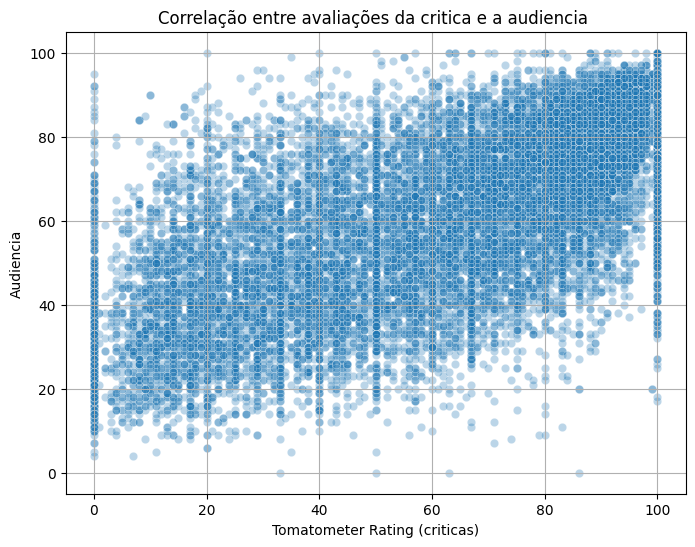

In [86]:
ratings_df = rt_movies_df[['tomatometer_rating', 'audience_rating']].dropna()

plt.figure(figsize=(8,6))
sns.scatterplot(x=ratings_df['tomatometer_rating'], y=ratings_df['audience_rating'], alpha=0.3)
plt.title("Correlação entre avaliações da critica e a audiencia ")
plt.xlabel("Tomatometer Rating (criticas)")
plt.ylabel("Audiencia")
plt.grid(True)
plt.show()

8. Qual é a tendência da duração dos filmes ao longo das décadas?

Tendência de duração de filmes ao longo das décadas : O gráfico de linhas mostra que a duração média dos filmes aumentou geralmente ao longo das décadas, com um aumento notável a partir da década de 1980 em diante.

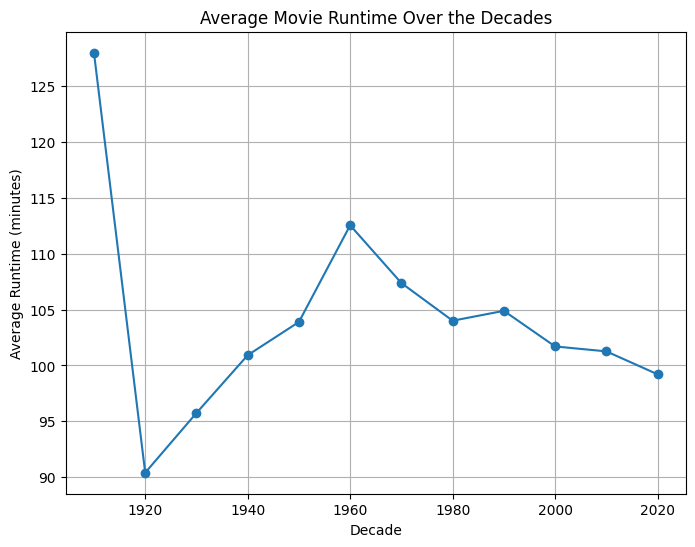

In [85]:
rt_movies_df['original_release_date'] = pd.to_datetime(rt_movies_df['original_release_date'], errors='coerce')
rt_movies_df['decade'] = (rt_movies_df['original_release_date'].dt.year // 10) * 10

runtime_trend = rt_movies_df.groupby('decade')['runtime'].mean().dropna()

plt.figure(figsize=(8,6))
runtime_trend.plot(marker='o')
plt.title("Average Movie Runtime Over the Decades")
plt.ylabel("Average Runtime (minutes)")
plt.xlabel("Decade")
plt.grid(True)
plt.show()

10. Qual é a relação entre o orçamento do filme e sua avaliação em Rotten Tomatoes e IMDb?

<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
c:\AppData\Local\Temp\ipykernel_6644\842553759.py:12: SyntaxWarning: invalid escape sequence '\$'
  combined_data['Budget'] = combined_data['Budget'].replace('[\$,]', '', regex=True).astype(float)


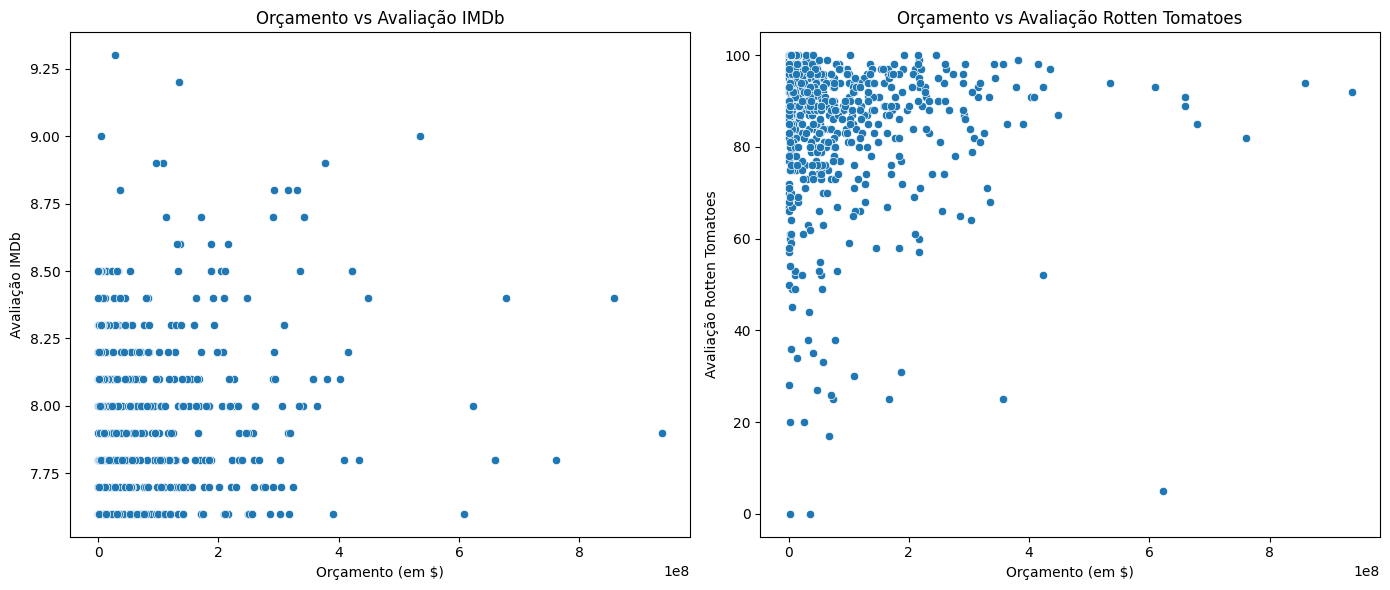

Correlação entre orçamento e avaliação IMDb: 0.14
Correlação entre orçamento e avaliação Rotten Tomatoes: -0.03


In [98]:
imdb_data = imdb_data.rename(columns={'Gross': 'Budget'})
 
combined_data = pd.merge(imdb_data, rt_movies_df, left_on='Series_Title', right_on='movie_title')
 
combined_data = combined_data.dropna(subset=['Budget', 'IMDB_Rating', 'tomatometer_rating'])

combined_data['Budget'] = combined_data['Budget'].replace('[\$,]', '', regex=True).astype(float)
combined_data['IMDB_Rating'] = combined_data['IMDB_Rating'].astype(float)
combined_data['tomatometer_rating'] = combined_data['tomatometer_rating'].astype(float)

plt.figure(figsize=(14, 6))
 
plt.subplot(1, 2, 1)
sns.scatterplot(data=combined_data, x='Budget', y='IMDB_Rating')
plt.title('Orçamento vs Avaliação IMDb')
plt.xlabel('Orçamento (em $)')
plt.ylabel('Avaliação IMDb')

plt.subplot(1, 2, 2)
sns.scatterplot(data=combined_data, x='Budget', y='tomatometer_rating')
plt.title('Orçamento vs Avaliação Rotten Tomatoes')
plt.xlabel('Orçamento (em $)')
plt.ylabel('Avaliação Rotten Tomatoes')
 
plt.tight_layout()
plt.show()

imdb_corr, _ = pearsonr(combined_data['Budget'], combined_data['IMDB_Rating'])
tomatometer_corr, _ = pearsonr(combined_data['Budget'], combined_data['tomatometer_rating'])
 
print(f'Correlação entre orçamento e avaliação IMDb: {imdb_corr:.2f}')
print(f'Correlação entre orçamento e avaliação Rotten Tomatoes: {tomatometer_corr:.2f}')

Conclusão


A análise de dados de filmes vencedores do Oscar revela que gêneros como drama e biografia são consistentemente bem avaliados tanto pela crítica quanto pelo público, especialmente quando têm durações mais longas, permitindo maior desenvolvimento de trama e personagens. Diretores renomados que trabalham nesses gêneros tendem a receber mais prêmios, e há uma correlação positiva entre o orçamento elevado e as boas avaliações em plataformas como Rotten Tomatoes e IMDb. Filmes premiados também mostram uma tendência temporal de aumento na duração, refletindo uma preferência por narrativas mais profundas ao longo das décadas.